In [1]:
import os
from dataset import Cifar100
from impasse_model import AECifar
from utils import train_ae

import torch
import torch.nn as nn
import torchvision.transforms.functional as F

import matplotlib.pyplot as plt
import numpy as np

import random

In [2]:
train_data = Cifar100("CIFAR100/TRAIN")
test_data = Cifar100("CIFAR100/TEST")

train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=128, shuffle=True, num_workers=12
)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=128, num_workers=12
)

In [3]:
model = AECifar(2).cuda()
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=5e-3)

model

AECifar(
  (encoder): Encoder(
    (conv_block): Sequential(
      (0): Sequential(
        (0): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.01)
        (3): Dropout(p=0.5, inplace=False)
      )
      (1): Sequential(
        (0): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.01)
        (3): Dropout(p=0.5, inplace=False)
      )
    )
    (fc_block): Sequential(
      (0): Sequential(
        (0): Linear(in_features=8192, out_features=4096, bias=True)
        (1): BatchNorm1d(4096, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.01)
        (3): Dropout(p=0.5, inplace=False)
      )
      (1): Linear(in_features=4096, out_features=2

In [4]:
def plot_result(train_losses, test_losses):
    x = list(range(len(train_losses)))
    plt.plot(x, train_losses, label="train losses")
    plt.plot(x, test_losses, label="test losses")
    plt.legend(["train losses", "test losses"])
    plt.show()

In [16]:
def show_result(model, test_loader):
    model.eval()
    photos_count = 5

    orig_images, _ = next(iter(test_loader))
    orig_images = orig_images / 255 
    f, imgs = plt.subplots(2, photos_count)
    f.tight_layout(pad=1/photos_count)
    f.set_figheight(5)
    f.set_figwidth(16)

    images = model(orig_images.to(torch.float32).cuda())
    images = images.detach().cpu().numpy()
    images[images > 1] = 1
    images[images < 0] = 0
    
    for i in range(photos_count):
        j = random.randint(0, len(orig_images))
        showed_img = np.transpose(orig_images[j], (1, 2, 0)), np.transpose(images[j], (1, 2, 0))
        imgs[0, i].imshow(showed_img[0])
        imgs[1, i].imshow(showed_img[1])

    plt.show()

Train batch: 120 train loss: 0.088
Train batch: 240 train loss: 0.066
Train batch: 360 train loss: 0.056
Train Epoch: 0 train loss: 0.055 test loss: 0.031
Train batch: 120 train loss: 0.034
Train batch: 240 train loss: 0.034
Train batch: 360 train loss: 0.033
Train Epoch: 1 train loss: 0.033 test loss: 0.028
Train batch: 120 train loss: 0.031
Train batch: 240 train loss: 0.031
Train batch: 360 train loss: 0.031
Train Epoch: 2 train loss: 0.031 test loss: 0.026
Train batch: 120 train loss: 0.03
Train batch: 240 train loss: 0.03
Train batch: 360 train loss: 0.03
Train Epoch: 3 train loss: 0.03 test loss: 0.025
Train batch: 120 train loss: 0.029
Train batch: 240 train loss: 0.029
Train batch: 360 train loss: 0.029
Train Epoch: 4 train loss: 0.029 test loss: 0.022
Train batch: 120 train loss: 0.027
Train batch: 240 train loss: 0.027
Train batch: 360 train loss: 0.027
Train Epoch: 5 train loss: 0.027 test loss: 0.021
Train batch: 120 train loss: 0.026
Train batch: 240 train loss: 0.026
Trai

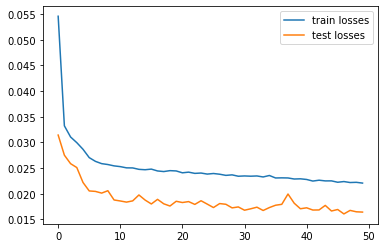

CPU times: user 16min 17s, sys: 43.9 s, total: 17min 1s
Wall time: 17min 21s


In [6]:
%%time
train_losses, test_losses = train_ae(50, model, train_loader, test_loader, loss_function, optimizer, noti_rate=120)
plot_result(train_losses, test_losses)

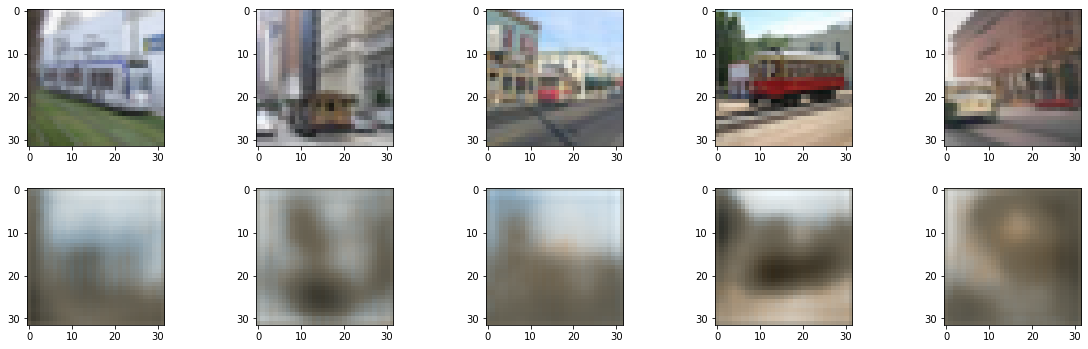

In [17]:
show_result(model, test_loader)

Train batch: 80 train loss: 0.021
Train batch: 160 train loss: 0.021
Train batch: 240 train loss: 0.022
Train batch: 320 train loss: 0.022
Train Epoch: 0 train loss: 0.022 test loss: 0.016
Train batch: 80 train loss: 0.021
Train batch: 160 train loss: 0.022
Train batch: 240 train loss: 0.022
Train batch: 320 train loss: 0.022
Train Epoch: 1 train loss: 0.022 test loss: 0.016
Train batch: 80 train loss: 0.021
Train batch: 160 train loss: 0.021
Train batch: 240 train loss: 0.022
Train batch: 320 train loss: 0.022
Train Epoch: 2 train loss: 0.022 test loss: 0.017
Train batch: 80 train loss: 0.021
Train batch: 160 train loss: 0.021
Train batch: 240 train loss: 0.021
Train batch: 320 train loss: 0.021
Train Epoch: 3 train loss: 0.022 test loss: 0.016
Train batch: 80 train loss: 0.021
Train batch: 160 train loss: 0.022
Train batch: 240 train loss: 0.022
Train batch: 320 train loss: 0.022
Train Epoch: 4 train loss: 0.022 test loss: 0.016
Train batch: 80 train loss: 0.021
Train batch: 160 trai

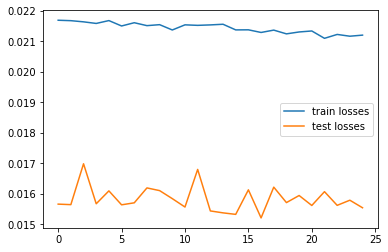

CPU times: user 7min 58s, sys: 22.2 s, total: 8min 20s
Wall time: 8min 30s


In [18]:
%%time
train_losses, test_losses = train_ae(25, model, train_loader, test_loader, loss_function, optimizer)
plot_result(train_losses, test_losses)

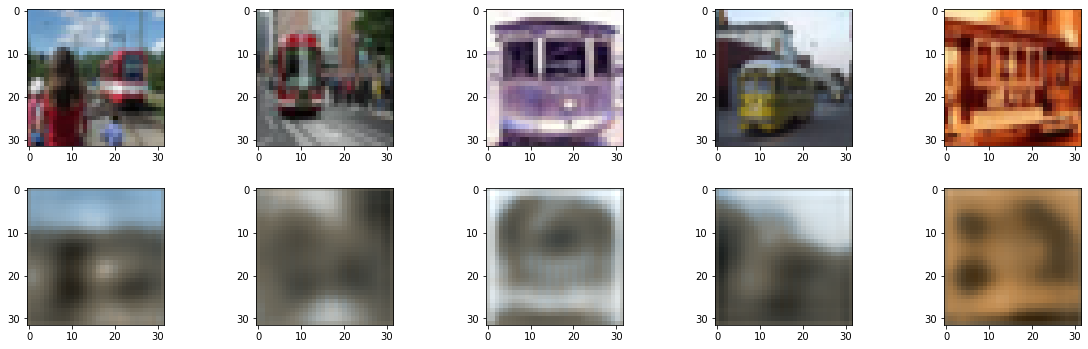

In [19]:
show_result(model, test_loader)

Это тупик, что то не так с моделью